### Import your librares

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")  

### Load your dataset

In [2]:
x = pd.read_csv('seattle_weather.csv')

### Handle missing data in PRCP and RAIN columns

In [3]:
x['PRCP'].fillna(x['PRCP'].mean(), inplace=True)
x.isnull().sum()

DATE    0
PRCP    0
TMAX    0
TMIN    0
RAIN    3
dtype: int64

In [4]:
m=x['RAIN'].fillna(x['RAIN'].mode()[0], inplace=True)
x.isnull().sum()


DATE    0
PRCP    0
TMAX    0
TMIN    0
RAIN    0
dtype: int64

### Repeat the following steps for each column within outliers

* Visualize the outliers
* Detect if your data set contains any outliers
* Identify lower & higher limit of outliers
* Drop all outliers
* Visualize the column after processing


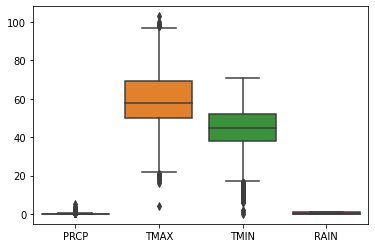

In [5]:
sns.boxplot(data=x);

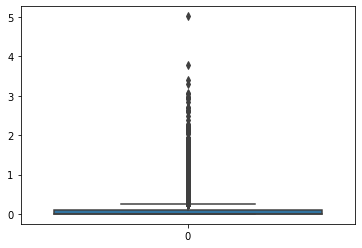

In [6]:
sns.boxplot(data=x['PRCP']);

In [7]:
Q1 = np.percentile(x['PRCP'], 25, interpolation = 'midpoint')
Q3 = np.percentile(x['PRCP'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
               
print('lower bound outliers ', Q1 - 1.5*(IQR))
print('higher bound outliers', Q3 + 1.5*(IQR))

lower bound outliers  -0.15000000000000002
higher bound outliers 0.25


In [20]:
x = x.drop(x[(x['PRCP'] > 0.25) | (x['PRCP'] < -0.15)].index)

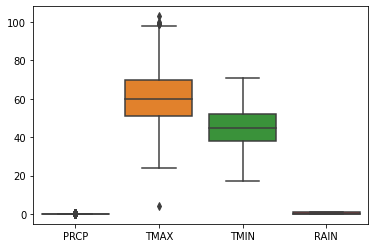

In [21]:
sns.boxplot(data=x);

In [14]:
Q1 = np.percentile(x['TMIN'], 25, interpolation = 'midpoint')
Q3 = np.percentile(x['TMIN'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
               
print('lower bound outliers ', Q1 - 1.5*(IQR))
print('higher bound outliers', Q3 + 1.5*(IQR))

lower bound outliers  17.0
higher bound outliers 73.0


In [15]:
x = x.drop(x[(x['TMIN'] > 73) | (x['TMIN'] < 17)].index)

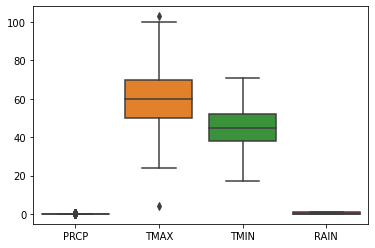

In [18]:
sns.boxplot(data=x);

In [19]:
Q1 = np.percentile(x['TMAX'], 25, interpolation = 'midpoint')
Q3 = np.percentile(x['TMAX'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
               
print('lower bound outliers ', Q1 - 1.5*(IQR))
print('higher bound outliers', Q3 + 1.5*(IQR))

lower bound outliers  20.0
higher bound outliers 100.0


In [22]:
x = x.drop(x[(x['TMIN'] > 100) | (x['TMIN'] < 20)].index)

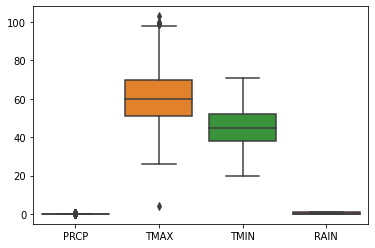

In [23]:
sns.boxplot(data=x);